<a href="https://colab.research.google.com/github/safiullinrashid/computer-vision-/blob/main/%D0%B4%D0%B7_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%BE%D1%82%D0%B5%D1%85%D0%BD%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

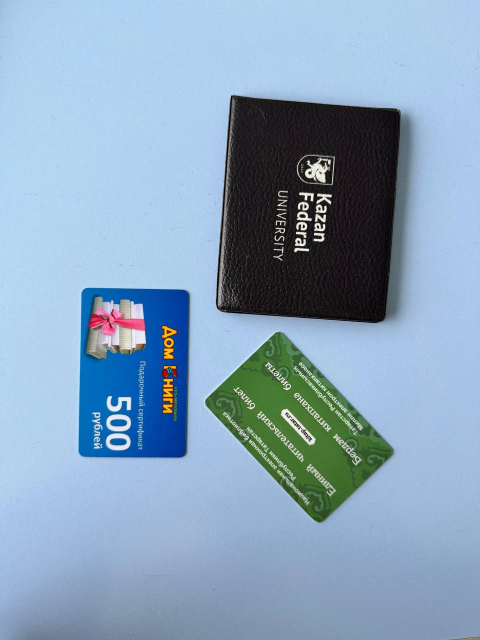

Уменьшенное изображение


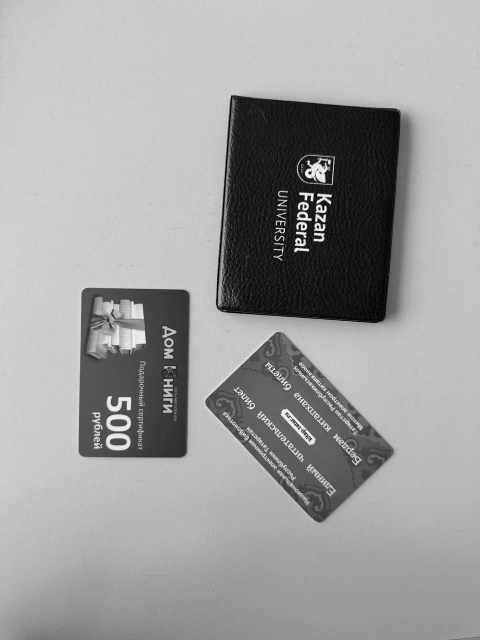

Изображение в оттенках серого


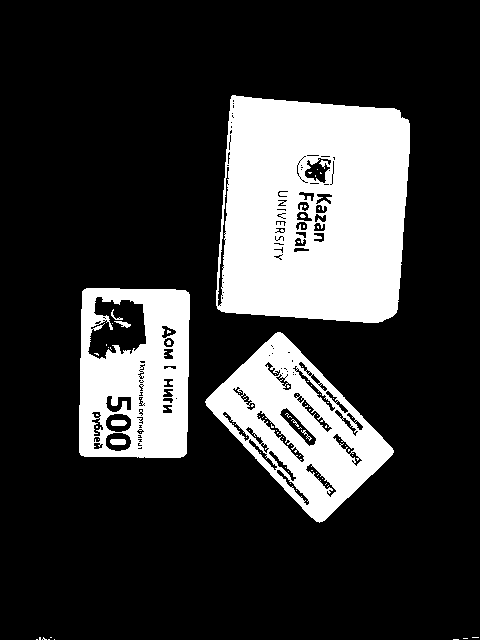

Изображение после пороговой обработки


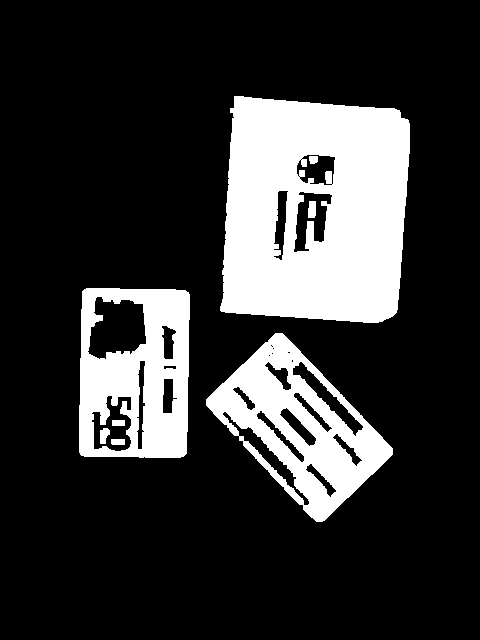

Изображение после удаления шумов)


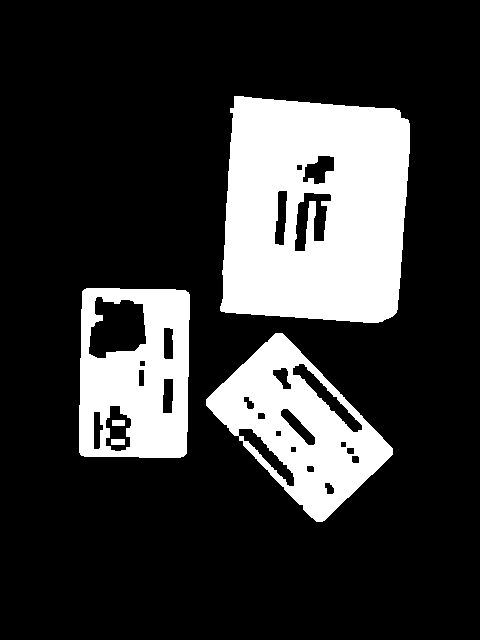

Изображение после заполнения отверстий)


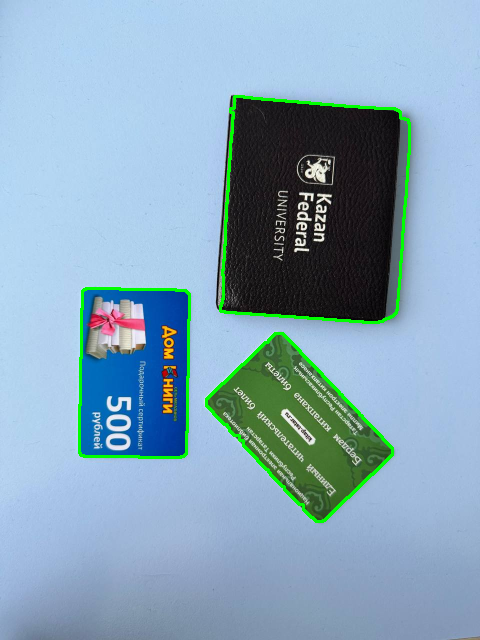

Изображение с контурами


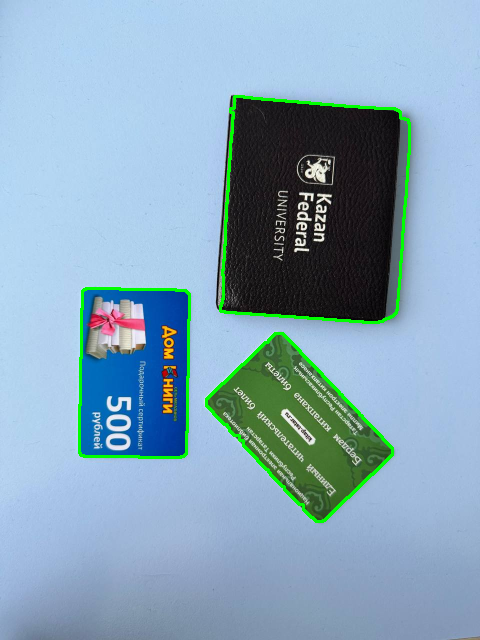

Изображение с отфильтрованными контурами


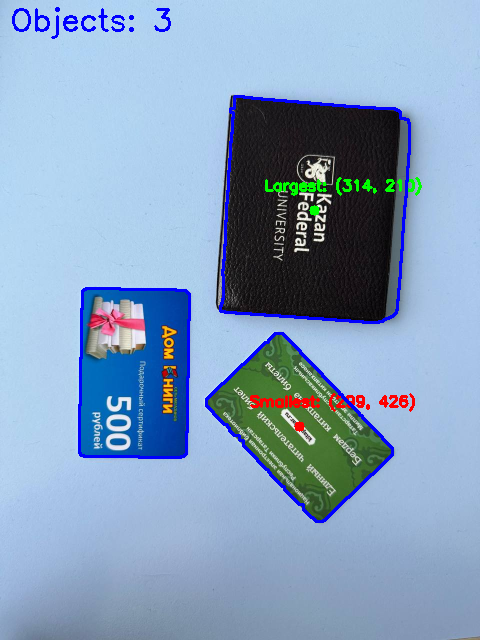

Финальное изображение с центрами и контурами


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/photo_2024-12-27_14-48-03.jpg')

# Уменьшение размера изображения
scale_percent = 50
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

cv2_imshow(resized_image)
print("Уменьшенное изображение")

# Преобразование в оттенки серого
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
print("Изображение в оттенках серого")

# Применение пороговой обработки с методом Оцу
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2_imshow(thresh)
print("Изображение после пороговой обработки")

# удаления шумов
kernel = np.ones((5, 5), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
cv2_imshow(thresh)
print("Изображение после удаления шумов)")

thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)  # Заполнение небольших отверстий
cv2_imshow(thresh)
print("Изображение после заполнения отверстий)")

# Нахождение контуров
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Создание копии изображения для отрисовки контуров
contour_image = resized_image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Отрисовка всех контуров
cv2_imshow(contour_image)
print("Изображение с контурами")

# Фильтрация контуров по площади
min_area = 500
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Создание копии изображения для отрисовки отфильтрованных контуров
filtered_contour_image = resized_image.copy()
cv2.drawContours(filtered_contour_image, filtered_contours, -1, (0, 255, 0), 2)  # Отрисовка отфильтрованных контуров
cv2_imshow(filtered_contour_image)
print("Изображение с отфильтрованными контурами")

# Переменные для хранения информации о самом большом и самом маленьком объекте
largest_contour = None
smallest_contour = None
max_area = 0
min_area = float('inf')

# Перебор всех отфильтрованных контуров
for contour in filtered_contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        largest_contour = contour
    if area < min_area:
        min_area = area
        smallest_contour = contour

# Функция для нахождения центра контура
def get_center(contour):
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    return (cX, cY)

# Нахождение центров самого большого и самого маленького объекта
if largest_contour is not None:
    largest_center = get_center(largest_contour)
    cv2.circle(resized_image, largest_center, 5, (0, 255, 0), -1)
    cv2.putText(resized_image, f"Largest: {largest_center}", (largest_center[0] - 50, largest_center[1] - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

if smallest_contour is not None:
    smallest_center = get_center(smallest_contour)
    cv2.circle(resized_image, smallest_center, 5, (0, 0, 255), -1)
    cv2.putText(resized_image, f"Smallest: {smallest_center}", (smallest_center[0] - 50, smallest_center[1] - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Обводка всех отфильтрованных контуров и вывод количества объектов
cv2.drawContours(resized_image, filtered_contours, -1, (255, 0, 0), 2)
cv2.putText(resized_image, f"Objects: {len(filtered_contours)}", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

# Сохранение и отображение результата
cv2.imwrite('result.jpg', resized_image)
cv2_imshow(resized_image)
print("Финальное изображение с центрами и контурами")